# Atividade : Elementos Visuais
**M12-FUNDAMENTOS DA DESCOBERTA DE DADOS**



Abaixo temos um dataframe com as seguintes informações:

* **Nome:** O nome de cada indivíduo da base
* **Idade:** A idade de cada um deles
* **Profissão:** A atual ocupação
* **Salário:** O salário registrado
* **Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos
* **Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.
* **Estado civil:** O estado civil de cada um deles
* **Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

A proposta da atividade é que utilizem os dados do DataFrame e escolham apenas 3 gráficos que ajudem vocês a **identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto**.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

## Objetivos: Identificar váriaveis que impulsionem o limite de crédito. 

### Modificação no conjunto de dados original
1. Os valores das colunas Salário e Limite_Crédito, originalmente representados como strings numéricas, foram convertidos para um formato numérico apropriado
2. Foram criadas novas variáveis categóricas a partir das colunas originais. Para a coluna Histórico de Inadimplência, foram geradas as variáveis Bom Pagador e Inadimplência. A coluna Imóvel Próprio foi transformada nas variáveis Com Imóvel e Sem Imóvel. Por fim, a variável Estado Civil foi representada pelas categorias Casado e Solteiro. As colunas originais foram descartadas

### pré-avaliação

De posse disso, foi construído um mapa de calor da matriz de correlação utilizando as seguintes variáveis: Idade, Salário, Sem Imóvel, Com Imóvel, Bom Pagador, Inadimplência, Casado, Solteiro e Limite de Crédito. Essa análise possibilitou a identificação de padrões e relações entre as variáveis. 
### Correlação positiva com limite de crédito : Idade, Salário, ter imovel,Bom Pagador, Casado
### Correlação Inversa  com limite de crédito : Sem Imovel,Inadiplencia, Solteiro



In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns


In [178]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissao': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salario': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df['Salario']=df['Salario'].astype(float)
df['Limite_Credito']=df['Limite_Credito'].astype(float)



df=pd.concat([df,pd.get_dummies(df['Imovel_Proprio'],prefix='Imovel_Proprio')],axis=1)
df=pd.concat([df,pd.get_dummies(df['Historico_Inadimplencia'],prefix='Inadimplencia')],axis=1)
df=pd.concat([df,pd.get_dummies(df['Estado_Civil'],prefix='Estado_Civil')],axis=1)

#remoção da colunas binárias
df.drop(columns=['Historico_Inadimplencia','Estado_Civil','Imovel_Proprio'], inplace=True)

df.rename(columns={'Imovel_Proprio_0': 'Sem Imovel', 
                   'Imovel_Proprio_1': 'Com Imovel',
                   'Inadimplencia_0': 'Bom Pagador',
                   'Inadimplencia_1': 'Inadimplencia',
                   'Estado_Civil_Casamento': 'Casado',
                   'Estado_Civil_Solteiro': 'Solteiro'
                  
                  
                  }, inplace=True)

df

,Nome,Idade,Profissao,Salario,Limite_Credito,Sem Imovel,Com Imovel,Bom Pagador,Inadimplencia,Casado,Solteiro
0,Alice,25,Engenheiro,4500.0,2500.0,1,0,1,0,1,0
1,Joao,30,Médico,8000.0,4000.0,1,0,1,0,1,0
2,Charlie,35,Professor,5000.0,4000.0,1,0,1,0,0,1
3,David,40,Advogado,10000.0,1000.0,0,1,0,1,0,1
4,Eva,45,Médico,12000.0,10000.0,0,1,1,0,1,0
5,Diego,60,Engenheiro,15000.0,2000.0,0,1,0,1,0,1
6,Denize,22,Estudante,1200.0,500.0,1,0,1,0,0,1
7,Claudio,24,Estudante,1500.0,250.0,1,0,0,1,0,1


Text(0.5, 1.0, 'Mapa de calor da correlação entre variáveis')

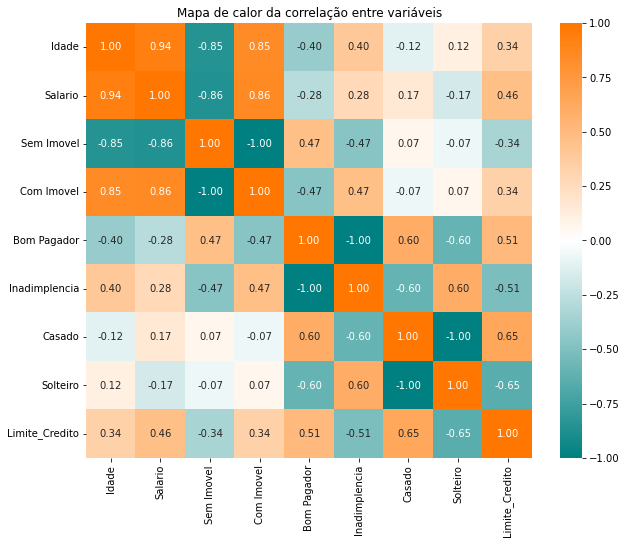

In [185]:
df_corr = df[['Idade',
              'Salario',
              'Sem Imovel',
              'Com Imovel',
              'Bom Pagador',
              'Inadimplencia',
              'Casado',
              'Solteiro',
              'Limite_Credito'
            ]].corr()

correlacao_idade_limite = df['Idade'].corr(df['Limite_Credito'])


# Heatmap de correlação
teal_orange = LinearSegmentedColormap.from_list("TealOrange", ["#008080", "#FFFFFF", "#FF7700"])

plt.figure(figsize=(10, 8))

sns.heatmap(df_corr, annot=True, cmap=teal_orange, fmt=".2f")
plt.title('Mapa de calor da correlação entre variáveis')

Solteiro         -0.646218
Inadimplencia    -0.509885
Sem Imovel       -0.340832
Com Imovel        0.340832
Idade             0.342074
Salario           0.461841
Bom Pagador       0.509885
Casado            0.646218
Limite_Credito    1.000000
Name: Limite_Credito, dtype: float64

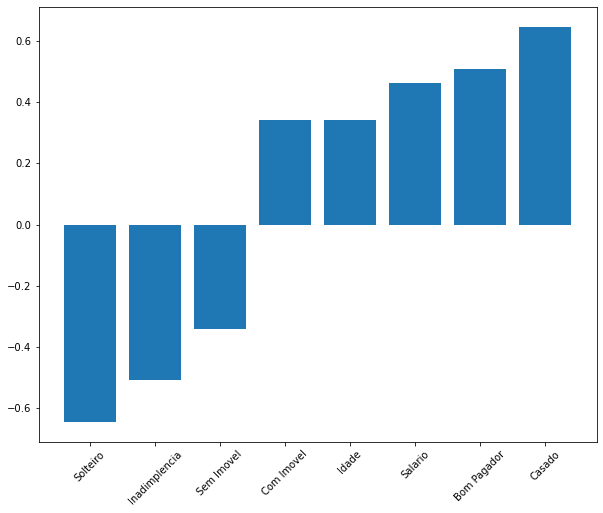

In [184]:
correlacao_idade_limite = df['Limite_Credito'].corr(df['Idade'])
correlacao = df[['Limite_Credito',
              'Idade',
              'Salario',
              'Sem Imovel',
              'Com Imovel',
              'Bom Pagador',
              'Inadimplencia',
              'Casado',
              'Solteiro']].corr()
#print(correlacoes['Limite_Credito'][['Salário', 'Idade']])
A=correlacao['Limite_Credito'].sort_values()

plt.figure(figsize=(10, 8))
plt.bar(A[0:8].index, A[0:8])
plt.xticks(rotation=45)

In [154]:
#Agrupamentos
agrupar limite de créditox estado civil

limite_estado= df.groupby('Estado_Civil')['Limite_Credito'].mean()
limite_profissao= df.groupby('Profissão')['Limite_Credito'].mean()
#limite_idade= df.groupby('Idade')['Limite_Credito'].mean()

#idade_salario= df.groupby('Idade')['limite_Credito','Salario']



#plt.bar(limite_estado.index, limite_estado)
#plt.bar(limite_profissao.index, limite_profissao)
#plt.bar(limite_idade.index, limite_idade)


#plt.bar(cdt_cv.index, cdt_cv)
#plt.bar(cdt_cv.index, cdt_cv)

#idade_salario

SyntaxError: invalid syntax (<ipython-input-154-e3c0e607b409>, line 2)